## Pandas 處理什麼樣的數據?

要加載pandas套件並開始使用它，請import該package。一般要設定pandas別名為`pd`，因此將pandas加載為pd被一般pandas範例的常見做法。

In [1]:
import pandas as pd

### pandas 資料結構的概念

![](images/01_table_dataframe.svg)

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想存儲Titanic的乘客數據。對於許多乘客，我知道姓名(str)，年齡(int)和性別(male/female)數據。

要將數據存儲在表中，請創建一個`DataFrame`物件。

In [5]:
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"]
    }
)

#Column info
print(df.info())

#前幾筆資料, 預設為5筆
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   Sex     3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes
None
                       Name  Age     Sex
0   Braund, Mr. Owen Harris   22    male
1  Allen, Mr. William Henry   35    male
2  Bonnell, Miss. Elizabeth   58  female


`DataFrame`是一種二維數據結構，可以在Column中存儲不同類型的數據（包括字符，整數，浮點值，分類數據等）。它類似於R中的`data.frame`，SQL的`table`。

在上述的範例:
* 該資料表表有3個columns，每個column都有一個column label。Column label分別是Name, Age和Sex。
* "Name"的column值由文字型別，每個值都是一個字串，"Age"是數字，"Sex"是文字數據。

在Excel中，這個數據的表格形式與dataframe的形式非常相似：

![](images/01_table_spreadsheet.png)

### DataFrame中的每一列都是一個Series

![](images/01_table_series.svg)

當我們只是對使用"Age"列中的數據感興趣, 可以只選擇讀取pandas DataFrame單個列，pandas會返回一個pandas的`Series`物件。要選擇列，請使用方括號`[]`並標註要讀取的column label。

In [6]:
#取得dataframe裡的一列序列資料
ages = df["Age"]

print(ages)

print(type(ages))

0    22
1    35
2    58
Name: Age, dtype: int64
<class 'pandas.core.series.Series'>


也可以從頭開始創建pandas的Series物件：

In [7]:
#創建Series
ages = pd.Series([22, 35, 58], name="Age")

print(ages)

print(type(ages))

0    22
1    35
2    58
Name: Age, dtype: int64
<class 'pandas.core.series.Series'>


### 使用 DataFrame 或 Series 來進行運算

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想知道乘客的最大年齡

> 如max()方法所示，您可以使用DataFrame或Series進行操作。 pandas提供了許多功能，每種功能都可以應用於DataFrame或Series。由於方法是函數，所以請不要忘記使用括號()。

In [8]:
# 使用Dataframe來計算最大年齡
max_age = df["Age"].max()

print(max_age)

58


In [9]:
# 或是使用Series來計算最大年齡
max_age = ages.max()

print(max_age)

58


> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我對數據表中數值數據的一些基本統計信息感興趣

> `describe()`方法提供了DataFrame中數值數據的快速概述。由於"name"和"Sex"列是文本數據，因此`describe()`方法預設不考慮這些數據的統計概述。

In [10]:
#只對數值做動作
df_desc = df.describe()

print(df_desc)

print(type(df_desc))

             Age
count   3.000000
mean   38.333333
std    18.230012
min    22.000000
25%    28.500000
50%    35.000000
75%    46.500000
max    58.000000
<class 'pandas.core.frame.DataFrame'>


許多Pandas的操作都會返回一個`DataFrame`或`Series`物件。 `describe()`方法是返回`Series`物件的pandas操作的範例。

## 如何讀取和寫入表格數據?

![](images/02_io_readwrite.svg)

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想分析Titanic乘客數據，該數據是CSV格式的文件資料。

> pandas提供了`read_csv()`函數，可將以csv文件存儲的數據讀取到pandas `DataFrame`中。pandas開箱即用地支持許多不同的文件格式或數據源(csv，excel，sql，json，parquet等)，每種格式都帶有前綴`read_*`。

<table class="colwidths-given table">
    <colgroup>
        <col style="width: 12%" />
        <col style="width: 40%" />
        <col style="width: 24%" />
        <col style="width: 24%" />
    </colgroup>
    <thead>
        <tr class="row-odd"><th class="head"><p>Format Type</p></th>
            <th class="head"><p>Data Description</p></th>
            <th class="head"><p>Reader</p></th>
            <th class="head"><p>Writer</p></th>
        </tr>
    </thead>
    <tbody>
        <tr class="row-even"><td><p>text</p></td>
            <td><p><a class="reference external" href="https://en.wikipedia.org/wiki/Comma-separated_values">CSV</a></p></td>
            <td><p><span class="std std-ref">read_csv()</span></p></td>
            <td><p><span class="std std-ref">to_csv()</span></p></td>
        </tr>
        <tr class="row-odd"><td><p>text</p></td>
            <td><p>Fixed-Width Text File</p></td>
            <td><p><span class="std std-ref">read_fwf()</span></p></td>
            <td></td>
        </tr>
        <tr class="row-even"><td><p>text</p></td>
            <td><p><a class="reference external" href="https://www.json.org/">JSON</a></p></td>
            <td><p><span class="std std-ref">read_json()</span></p></td>
            <td><p><span class="std std-ref">to_json()</span></p></td>
        </tr>
        <tr class="row-odd"><td><p>text</p></td>
            <td><p><a class="reference external" href="https://en.wikipedia.org/wiki/HTML">HTML</a></p></td>
            <td><p><span class="std std-ref">read_html()</span></p></td>
            <td><p><span class="std std-ref">to_html()</span></p></td>
        </tr>
        <tr class="row-even"><td><p>text</p></td>
            <td><p>Local clipboard</p></td>
            <td><p><span class="std std-ref">read_clipboard()</span></p></td>
            <td><p><span class="std std-ref">to_clipboard()</span></p></td>
        </tr>
        <tr class="row-odd"><td><p>binary</p></td>
            <td><p><a class="reference external" href="https://en.wikipedia.org/wiki/Microsoft_Excel">MS Excel</a></p></td>
            <td><p><span class="std std-ref">read_excel()</span></p></td>
            <td><p><span class="std std-ref">to_excel()</span></p></td>
        </tr>
        <tr class="row-even"><td><p>binary</p></td>
            <td><p><a class="reference external" href="http://www.opendocumentformat.org">OpenDocument</a></p></td>
            <td><p><span class="std std-ref">read_excel()</span></p></td>
            <td></td>
        </tr>
        <tr class="row-odd"><td><p>binary</p></td>
            <td><p><a class="reference external" href="https://support.hdfgroup.org/HDF5/whatishdf5.html">HDF5 Format</a></p></td>
            <td><p><span class="std std-ref">read_hdf()</span></p></td>
            <td><p><span class="std std-ref">to_hdf()</span></p></td>
        </tr>
        <tr class="row-even"><td><p>binary</p></td>
            <td><p><a class="reference external" href="https://github.com/wesm/feather">Feather Format</a></p></td>
            <td><p><span class="std std-ref">read_feather()</span></p></td>
            <td><p><span class="std std-ref">to_feather()</span></p></td>
        </tr>
        <tr class="row-odd"><td><p>binary</p></td>
            <td><p><a class="reference external" href="https://parquet.apache.org/">Parquet Format</a></p></td>
            <td><p><span class="std std-ref">read_parquet()</span></p></td>
            <td><p><span class="std std-ref">to_parquet()</span></p></td>
        </tr>
        <tr class="row-even"><td><p>binary</p></td>
            <td><p><a class="reference external" href="https://orc.apache.org/">ORC Format</a></p></td>
            <td><p><span class="std std-ref">read_orc()</span></p></td>
            <td></td>
        </tr>
        <tr class="row-odd"><td><p>binary</p></td>
            <td><p><a class="reference external" href="https://msgpack.org/index.html">Msgpack</a></p></td>
            <td><p><span class="std std-ref">read_msgpack()</span></p></td>
            <td><p><span class="std std-ref">to_msgpack()</span></p></td>
        </tr>
        <tr class="row-even"><td><p>binary</p></td>
            <td><p><a class="reference external" href="https://en.wikipedia.org/wiki/Stata">Stata</a></p></td>
            <td><p><span class="std std-ref">read_stata()</span></p></td>
            <td><p><span class="std std-ref">to_stata()</span></p></td>
        </tr>
        <tr class="row-odd"><td><p>binary</p></td>
            <td><p><a class="reference external" href="https://en.wikipedia.org/wiki/SAS_(software)">SAS</a></p></td>
            <td><p><span class="std std-ref">read_sas()</span></p></td>
            <td></td>
        </tr>
        <tr class="row-even"><td><p>binary</p></td>
            <td><p><a class="reference external" href="https://en.wikipedia.org/wiki/SPSS">SPSS</a></p></td>
            <td><p><span class="std std-ref">read_spss()</span></p></td>
            <td></td>
        </tr>
        <tr class="row-odd"><td><p>binary</p></td>
            <td><p><a class="reference external" href="https://docs.python.org/3/library/pickle.html">Python Pickle Format</a></p></td>
            <td><p><span class="std std-ref">read_pickle()</span></p></td>
            <td><p><span class="std std-ref">to_pickle()</span></p></td>
        </tr>
        <tr class="row-even"><td><p>SQL</p></td>
            <td><p><a class="reference external" href="https://en.wikipedia.org/wiki/SQL">SQL</a></p></td>
            <td><p><span class="std std-ref">read_sql()</span></p></td>
            <td><p><span class="std std-ref">to_sql()</span></p></td>
        </tr>
        <tr class="row-odd"><td><p>SQL</p></td>
            <td><p><a class="reference external" href="https://en.wikipedia.org/wiki/BigQuery">Google BigQuery</a></p></td>
            <td><p><span class="std std-ref">read_gbq()</span></p></td>
            <td><p><span class="std std-ref">to_gbq()</span></p></td>
        </tr>
    </tbody>
</table>

In [12]:
df_titanic = pd.read_csv("data/titanic.csv")
print(df_titanic.describe())
print(df_titanic.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想查看DataFrame的前8行。

> 要查看DataFrame的前N行，請使用`head()`方法以及所需的行數（在本例中為8）作為參數。

In [13]:
df_titanic_head = df_titanic.head(8)

print(df_titanic_head)

print(type(df_titanic_head))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    mal

### Pandas支援的數據類型

可以通過查看pandas `dtypes`屬性來檢查pandas如何解釋每種列數據類型：

In [14]:
df_column_dtypes = df_titanic.dtypes

print(df_column_dtypes)

print(type(df_column_dtypes))

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.series.Series'>


對於每個列，都列出了使用的數據類型。此DataFrame中的數據類型是整數(int64)，浮點數(float64)和字串(object)。

Pandas dtype|Python type|NumPy type|Usage
:-----------|:----------|:---------|:----
object	|str or mixed	|string_, unicode_, mixed types	|ext or mixed numeric and non-numeric values
int64	|int	|int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64	|Integer numbers
float64	|float	|float_, float16, float32, float64	|Floating point numbers
bool	|bool	|bool_	|True/False values
datetime64	|datetime	|datetime64[ns]	|Date and time values
timedelta[ns]	|NA	|NA	|Differences between two datetimes
category	|NA	|NA	|Finite list of text values

### 將dataframe拋轉成Excel文件檔案

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我的同事要求我提供Excel檔案格式的Titanic數據。

> `read_*`函數用於將數據讀取進Pandas，而`to_*`方法用於存儲數據。 `to_excel()`方法將數據存儲為excel文件。在此處的範例中，sheet_name被命名為**passengers**，而不是預設的**Sheet1**。通過設置`index = False`，dataframe的行索引標籤被不會保存在Excel資料檔中。

In [15]:
df_titanic.to_excel('titanic.xlsx', sheet_name='passengers', index=False)

### 讀取Excel文件檔案成為dataframe物件

Pandas提供很方便的讀取函數`read_excel()`來將Excel檔案裡的數據加載到DataFrame中：

In [18]:
df_titanic_xls = pd.read_excel('titanic.xlsx', sheet_name='passengers')

df_titanic_xls_head = df_titanic_xls.head()

print(df_titanic_xls_head)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我對DataFrame的技術摘要感興趣

>`info()`方法提供有關DataFrame的技術信息，因此讓我們更詳細地說明這個方法的輸出：
>* 它表示這個物件的確是一個`DataFrame`物件。
>* 這個DataFrame裡頭有891筆資料。
>* 每一筆資料在DataFrame裡都會給予一個row label (是DataFrame內部的index) 而這個值是從0到890。
>* 這個table有12個columns。大多數的columns裡都有值 (全部891值都是non-null)。然而有一些columns有一些缺失值（missing values）所以它有值的的count會少於891個。
>* 欄位Name, Sex, Cabin與Embarked是文字型類的資料 (strings, 在DatataFrame中以object來儲存)。其它的欄位是數字類型的資料, 有些是整數 (aka integer) 及有些是浮點數 (aka float)。
>* 總結這個DataFrame物件會用到的資料型別(dtypes)的個數。
>* 還提供了這個DataFrame物件會使用到電腦記憶體(RAM)大概數量。

In [19]:
df_titanic_info = df_titanic.info()

print(df_titanic_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## 如何讀取DataFrame中部份的資料?

### 如何讀取DataFrame中特定的列資料?

![](images/03_subset_columns.svg)

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我對Titanic乘客的年齡感興趣。

> 要選擇單個column，請使用方括號`[]`和感興趣的列的列名。

In [20]:
ages = df_titanic["Age"]

print(ages.head())

print(type(ages))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64
<class 'pandas.core.series.Series'>


DataFrame中的每一列都是一個Series物件。在範例中我們通過檢查輸出的類型來驗證這一點。
同時我們也可以看一個這個物件的shape:

In [21]:
ages_shape = df_titanic["Age"].shape

print(ages_shape)

print(type(ages_shape))

(891,)
<class 'tuple'>


**DataFrame.shape**是pandas Series和DataFrame物件的屬性, 該屬性包含**筆數**和**列數**： (nrows, ncolumns)。pandas Series物件是一維的，僅返回筆數。

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我對Titanic乘客的年齡與性別感興趣。

> 要選擇多列，請在選擇括號[]中使用列名list。

In [22]:
age_sex = df_titanic[["Age", "Sex"]]

print(age_sex.head())

    Age     Sex
0  22.0    male
1  38.0  female
2  26.0  female
3  35.0  female
4  35.0    male


DataFrame物件多個列選取返回的數據類型也是pandas DataFrame：

In [23]:
print(type(age_sex))

print(age_sex.shape)

<class 'pandas.core.frame.DataFrame'>
(891, 2)


選擇返回的DataFrame具有891筆和2列。記住，DataFrame是**二維**的。

### 如何過濾出DataFrame中特定筆數的資料?

![](images/03_subset_rows.svg)

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我對Titanic乘客的年齡大於35歲的感興趣。

> Dataframe的loc屬性可以用來過濾與選擇資料, 第一個部份主要是條件而第二個部份是要output的columns資料。

In [103]:
adult_names = df_titanic.loc[df_titanic["Age"] > 35, "Name"]

print(adult_names.head())

print(type(adult_names))

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
6                               McCarthy, Mr. Timothy J
11                             Bonnell, Miss. Elizabeth
13                          Andersson, Mr. Anders Johan
15                     Hewlett, Mrs. (Mary D Kingcome) 
Name: Name, dtype: object
<class 'pandas.core.series.Series'>


> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我對Titanic資料集中第10 - 25筆的3 - 5列感興趣。

> 如果對於Dataframe中某些行和/或列特別感興趣，請使用iloc運算符。

In [27]:
subset = df_titanic.iloc[9:25, 2:5]

print(subset.head())

print(type(subset))

    Pclass                                 Name     Sex
9        2  Nasser, Mrs. Nicholas (Adele Achem)  female
10       3      Sandstrom, Miss. Marguerite Rut  female
11       1             Bonnell, Miss. Elizabeth  female
12       3       Saundercock, Mr. William Henry    male
13       3          Andersson, Mr. Anders Johan    male
<class 'pandas.core.frame.DataFrame'>


## 如何在Pandas中創建圖表?

![](images/04_plot_overview.svg)

In [29]:
import matplotlib.pyplot as plt

在本教程中，將使用一個有關NO2的空氣質量公開數據。 `air_quality_no2.csv`數據集為分別位於巴黎，安特衛普和倫敦的測量站FR04014，BETR801和倫敦威斯敏斯特提供NO2值。

> **NO2(二氧化氮)**: 二氧化氮在臭氧的形成過程中起著重要作用。人為產生的二氧化氮主要來自高溫燃燒過程的釋放，比如汽車/機車的排氣、鍋爐廢氣的排放等等。二氧化氮還是酸雨的成因之一。

> 注意: 在這個資料集中我們會使用**時間**做為DataFrame物件的內部index列。

> 使用`read_csv()`函數的`index_col`和`parse_dates`參數將第一（第0）列定義為DataFrame的索引，並將該列中的日期分別轉換為Timestamp對象。

In [30]:
air_quality = pd.read_csv("data/air_quality_no2.csv", index_col=0, parse_dates=True)

print(air_quality.info())

print(air_quality.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2019-05-07 02:00:00 to 2019-06-21 02:00:00
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_antwerp  95 non-null     float64
 1   station_paris    1004 non-null   float64
 2   station_london   969 non-null    float64
dtypes: float64(3)
memory usage: 32.3 KB
None
                     station_antwerp  station_paris  station_london
datetime                                                           
2019-05-07 02:00:00              NaN            NaN            23.0
2019-05-07 03:00:00             50.5           25.0            19.0
2019-05-07 04:00:00             45.0           27.7            19.0
2019-05-07 05:00:00              NaN           50.4            16.0
2019-05-07 06:00:00              NaN           61.9             NaN


> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想對數據進行快速的視覺檢查。

> 借助DataFrame，pandas預設情況下為每個包含數字column創建一個折線圖。

<AxesSubplot:xlabel='datetime'>

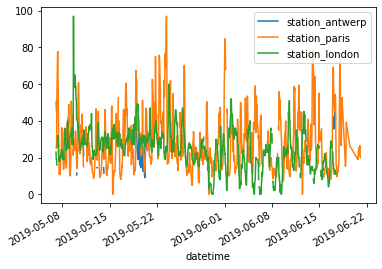

In [31]:
air_quality.plot()

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我只想使用來自Paris的數據列來繪製圖表。

> 要繪製特定列，請結合使用DataFrame來選擇Column的方法和`plot()`方法。因為`plot()`方法可在`Series`和`DataFrame`上使用。

<AxesSubplot:xlabel='datetime'>

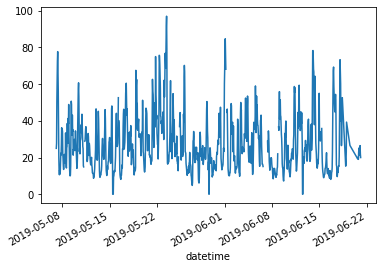

In [32]:
air_quality["station_paris"].plot()

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想在視覺上比較London和Paris測得的N02值。

<AxesSubplot:xlabel='station_london', ylabel='station_paris'>

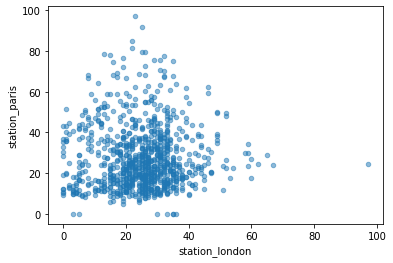

In [33]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)

使用繪圖功能時，除了預設的線圖外，還有許多方法可用於繪製數據。
* area
* bar
* barh
* box
* density
* hexbin
* hist
* kde
* line
* pie
* scatter

詳細的用法, 請參考: [Pandas Visualization](https://pandas.pydata.org/docs/user_guide/visualization.html)

圖表選項之一是`DataFrame.plot.box()`，它引用一個箱線圖。 Box方法適用於空氣質量範例數據：

<AxesSubplot:>

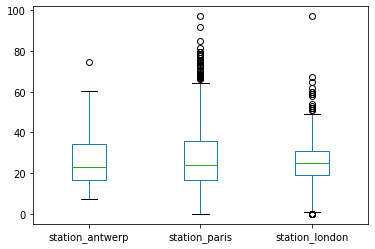

In [34]:
air_quality.plot.box()

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我希望每個數據列都在一個單獨的圖表。

array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>], dtype=object)

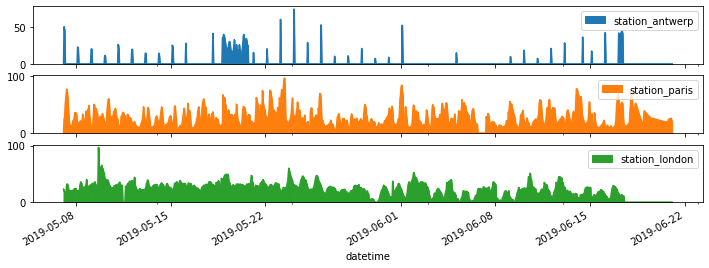

In [35]:
air_quality.plot.area(figsize=(12, 4), subplots=True)

## 如何從現有數據列創建衍生的新數據列?

![](images/05_newcolumn_1.svg)

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想以mg/m^3(毫克/立方公尺)來表示倫敦車站的NO2濃度

> （如果我們假設溫度為攝氏25度，壓力為1013 hPa，則轉換係數為1.882）

In [36]:
#要創建新資料列，在DataFrame使用帶有新數據列名稱的[]括號
air_quality["lodon_mg_per_cubic"] = air_quality["station_london"]*1.882

print(air_quality.info())

print(air_quality.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2019-05-07 02:00:00 to 2019-06-21 02:00:00
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   station_antwerp     95 non-null     float64
 1   station_paris       1004 non-null   float64
 2   station_london      969 non-null    float64
 3   lodon_mg_per_cubic  969 non-null    float64
dtypes: float64(4)
memory usage: 40.4 KB
None
                     station_antwerp  station_paris  station_london  \
datetime                                                              
2019-05-07 02:00:00              NaN            NaN            23.0   
2019-05-07 03:00:00             50.5           25.0            19.0   
2019-05-07 04:00:00             45.0           27.7            19.0   
2019-05-07 05:00:00              NaN           50.4            16.0   
2019-05-07 06:00:00              NaN           61.9             NaN   

                    

提示: 
* 要創建新資料列，在DataFrame使用帶有新數據列名稱的`[]`括號。
* 值的計算是按`element_wise`進行的。這意味著給定列中的所有值都將立即乘以值`1.882`。無需使用looping來迭代每一行！

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想檢查Paris與Antwerp兩個觀測站值的比率並將結果保存在新數據列中

In [37]:
air_quality["ratio_paris_antwerp"] = air_quality["station_paris"] / air_quality["station_antwerp"]

print(air_quality.info())

print(air_quality.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2019-05-07 02:00:00 to 2019-06-21 02:00:00
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_antwerp      95 non-null     float64
 1   station_paris        1004 non-null   float64
 2   station_london       969 non-null    float64
 3   lodon_mg_per_cubic   969 non-null    float64
 4   ratio_paris_antwerp  95 non-null     float64
dtypes: float64(5)
memory usage: 48.5 KB
None
                     station_antwerp  station_paris  station_london  \
datetime                                                              
2019-05-07 02:00:00              NaN            NaN            23.0   
2019-05-07 03:00:00             50.5           25.0            19.0   
2019-05-07 04:00:00             45.0           27.7            19.0   
2019-05-07 05:00:00              NaN           50.4            16.0   
2019-05-07 06:00:00              NaN

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想將數據列重新命名

> `rename()`函數可用於row標籤和column標籤。參數是提供一個dict，其中包含鍵，當前名稱和值，以及新名稱，以更新相應的名稱。

In [38]:
air_quality_renamed = air_quality.rename(
    columns = {
        "station_antwerp": "BETR801",
        "station_paris": "FR04014",
        "station_london": "London Westminster",
    }
)

print(air_quality_renamed.info())

print(air_quality_renamed.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2019-05-07 02:00:00 to 2019-06-21 02:00:00
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BETR801              95 non-null     float64
 1   FR04014              1004 non-null   float64
 2   London Westminster   969 non-null    float64
 3   lodon_mg_per_cubic   969 non-null    float64
 4   ratio_paris_antwerp  95 non-null     float64
dtypes: float64(5)
memory usage: 48.5 KB
None
                     BETR801  FR04014  London Westminster  lodon_mg_per_cubic  \
datetime                                                                        
2019-05-07 02:00:00      NaN      NaN                23.0              43.286   
2019-05-07 03:00:00     50.5     25.0                19.0              35.758   
2019-05-07 04:00:00     45.0     27.7                19.0              35.758   
2019-05-07 05:00:00      NaN     50.4                16.0

> `rename()`的`columns`參數, 不只限於使用固定名稱來配對改變，也還可以使用一個函數。例如，使用函數將列名轉換為小寫字母：

In [39]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)

print(air_quality_renamed.info())

print(air_quality_renamed.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2019-05-07 02:00:00 to 2019-06-21 02:00:00
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   betr801              95 non-null     float64
 1   fr04014              1004 non-null   float64
 2   london westminster   969 non-null    float64
 3   lodon_mg_per_cubic   969 non-null    float64
 4   ratio_paris_antwerp  95 non-null     float64
dtypes: float64(5)
memory usage: 48.5 KB
None
                     betr801  fr04014  london westminster  lodon_mg_per_cubic  \
datetime                                                                        
2019-05-07 02:00:00      NaN      NaN                23.0              43.286   
2019-05-07 03:00:00     50.5     25.0                19.0              35.758   
2019-05-07 04:00:00     45.0     27.7                19.0              35.758   
2019-05-07 05:00:00      NaN     50.4                16.0

## 如何計算資料的匯總與進行統計運算?

### 匯總統計 (descriptive statictics)

![](images/06_aggregate.svg)




> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> Titanic乘客的平均年齡是多少?

In [40]:
#可以將其應用於具有數字數據的column。通常，操作會排除missing data的數據
mean_age = df_titanic["Age"].mean()

print(mean_age)

print(type(mean_age))

29.69911764705882
<class 'numpy.float64'>


可以使用不同的統計信息，並且可以將其應用於具有`數字`數據的column。通常，操作會排除`missing data`的數據，並且預設情況下會跨行(across rows)進行操作。

![](images/06_reduction.svg)

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> Titanic乘客的年齡中位數和票價是多少？

> 將為每個數字column計算應用於DataFrame的多個column的統計信息（選擇兩個column將返回一個DataFrame）。

In [49]:
results = df_titanic[["Age", "Fare"]].median()

print(results)

print(type(results))

Age     28.0000
Fare    14.4542
dtype: float64
<class 'pandas.core.series.Series'>


Pandas可以同時為多個columns計算匯總統計信息。

In [42]:
results = df_titanic[["Age", "Fare"]].describe()

print(results)

print(type(results))

              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200
<class 'pandas.core.frame.DataFrame'>


除了上述範例直接使用預定義的統計信息以外，也可以使用`DataFrame.agg()`方法定義給定列的匯總統計信息的特定組合：

In [50]:
results = df_titanic.agg(
    {
        "Age":["min", "max", "median", "skew"],
        "Fare":["min", "max", "median", "mean"],    
    }
)

print(results)

print(type(results))

              Age        Fare
min      0.420000    0.000000
max     80.000000  512.329200
median  28.000000   14.454200
skew     0.389108         NaN
mean          NaN   32.204208
<class 'pandas.core.frame.DataFrame'>


> 有關描述性統計信息的詳細信息，請參見描述性統計信息的[用戶指南](https://pandas.pydata.org/docs/user_guide/basics.html#descriptive-statistics)。

### 匯總按類別分組的統計信息(group by)

![](images/06_groupby.svg)

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> Titanic男女乘客的平均年齡是多少？

> 由於我們的興趣是每種性別的平均年齡，因此首先在這兩個列上進行了子選擇：`df_titanic[["Sex", "Age"]]`。接下來，將`groupby()`方法應用於`Sex`列，以按類別創建一個group。計算並返回每種性別的平均年齡。

In [51]:
results = df_titanic[["Sex", "Age"]].groupby("Sex").mean()

print(results)

print(type(results))

              Age
Sex              
female  27.915709
male    30.726645
<class 'pandas.core.frame.DataFrame'>


通常為列中的每個類別（例如`Sex`列中的男性/女性）計算給定的統計信息（例如平均年齡）。 `groupby`方法用於支持這種類型的操作。更籠統地說，這適合於更一般的`split-apply-combine`模式：

* **Split** the data into groups

* **Apply** a function to each group independently

* **Combine** the results into a data structure

`apply `和`combine`步驟通常在pandas中一起完成。

在前面的範例中，我們首先明確選擇了2列。如果不是，則會將`mean`方法應用於包含**數字列**的每個列：

In [52]:
print(df_titanic.info())

results = df_titanic.groupby("Sex").mean()

print(results)

print(type(results))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
male     454.1473

獲取艙別`Pclass`的平均值沒有多大意義。如果我們只對每種性別的平均年齡感興趣，則分組數據中也支持選擇列（通常為矩形括號`[]`）：

> Pclass列包含數值數據，但實際上代表3個類別，分別是"1","2"與"3"。計算這些統計數據沒有多大意義。因此，pandas提供了`Categorical`數據類型來處理這種類型的數據。用戶指南[類別數據](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical)部分中提供了更多訊息。

In [53]:
results = df_titanic.groupby("Sex")["Age"].mean()

print(results)

print(type(results))

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
<class 'pandas.core.series.Series'>


![](images/06_groupby_select_detail.svg)

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 性別和機艙艙位組合的平均票價是多少?

> 分組可以同時由多個列完成。將列名作為列表提供給`groupby()`方法。

In [54]:
results = df_titanic.groupby(["Sex", "Pclass"])["Fare"].mean()

print(results)

print(type(results))

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64
<class 'pandas.core.series.Series'>


### 按類別計數記錄數 (count)

![](images/06_valuecounts.svg)

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 每個艙位的乘客人數是多少?

> `value_counts()`方法計算列中每個類別的記錄數。

In [55]:
results = df_titanic["Pclass"].value_counts()

print(results)

print(type(results))

3    491
1    216
2    184
Name: Pclass, dtype: int64
<class 'pandas.core.series.Series'>


`value_counts()`函數是一個快捷方式，因為它實際上是一個`groupby`操作，結合了對每個組中記錄數的計數：

In [57]:
#size()包括NaN值，僅提供行數（表的大小），而count()則排除缺失的值
results = df_titanic.groupby("Pclass")["Pclass"].count()

print(results)

print(type(results))

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64
<class 'pandas.core.series.Series'>


> `size()`和`count()`都可以與`groupby`結合使用。`size()`包括**NaN**值，僅提供行數（表的大小），而`count()`則排除**缺失的值**。在value_counts方法中，使用dropna參數包含或排除NaN值。

## 如何重塑Dataframe的layout?

### 排序Dataframe的內容

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想根據乘客的年齡對Titanic數據進行排序。

In [62]:
#預設升序, + ascending = False --> 降序
results = df_titanic.sort_values(by="Age")

print(results)

print(type(results))

     PassengerId  Survived  Pclass                                      Name  \
630          631         1       1      Barkworth, Mr. Algernon Henry Wilson   
851          852         0       3                       Svensson, Mr. Johan   
493          494         0       1                   Artagaveytia, Mr. Ramon   
96            97         0       1                 Goldschmidt, Mr. George B   
116          117         0       3                      Connors, Mr. Patrick   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex   Age  SibSp  Parch      Ti

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想根據機艙等級和年齡按降序對Titanic數據進行排序。

In [59]:
results = df_titanic.sort_values(by=['Pclass', 'Age'], ascending=[False, True])

print(results)

print(type(results))

     PassengerId  Survived  Pclass  \
803          804         1       3   
469          470         1       3   
644          645         1       3   
164          165         0       3   
172          173         1       3   
..           ...       ...     ...   
766          767         0       1   
793          794         0       1   
815          816         0       1   
839          840         1       1   
849          850         1       1   

                                             Name     Sex   Age  SibSp  Parch  \
803               Thomas, Master. Assad Alexander    male  0.42      0      1   
469                 Baclini, Miss. Helene Barbara  female  0.75      2      1   
644                        Baclini, Miss. Eugenie  female  0.75      2      1   
164                  Panula, Master. Eino Viljami    male  1.00      4      1   
172                  Johnson, Miss. Eleanor Ileen  female  1.00      1      1   
..                                            ...     ...

### 從長表(long table)轉換成寬表(wide table)

![](images/07_pivot.svg)

讓我們使用空氣質量數據集的一小部分。我們專注於NO2數據，並且僅使用每個位置（即每個組的頭）的前兩個測量值。數據子集將稱為no2_subset

In [63]:
df_air_quality = pd.read_csv("data/air_quality_long.csv", index_col="date.utc", parse_dates=True)

print(df_air_quality.info())

print(df_air_quality.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5272 entries, 2019-06-18 06:00:00+00:00 to 2019-04-09 02:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       5272 non-null   object 
 1   country    5272 non-null   object 
 2   location   5272 non-null   object 
 3   parameter  5272 non-null   object 
 4   value      5272 non-null   float64
 5   unit       5272 non-null   object 
dtypes: float64(1), object(5)
memory usage: 288.3+ KB
None
                                city country location parameter  value   unit
date.utc                                                                     
2019-06-18 06:00:00+00:00  Antwerpen      BE  BETR801      pm25   18.0  µg/m³
2019-06-17 08:00:00+00:00  Antwerpen      BE  BETR801      pm25    6.5  µg/m³
2019-06-17 07:00:00+00:00  Antwerpen      BE  BETR801      pm25   18.5  µg/m³
2019-06-17 06:00:00+00:00  Antwerpen      BE  BETR801      pm25   16.0  µg/m³

In [64]:
# filter for no2 data only
no2 = df_air_quality[df_air_quality["parameter"] == "no2"]

# use 2 measurements (head) for each location (groupby)
no2_subset = no2.sort_index().groupby(["location"]).head(2)

print(no2_subset.info())

print(no2_subset)

print(type(no2_subset))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2019-04-09 01:00:00+00:00 to 2019-04-09 03:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       6 non-null      object 
 1   country    6 non-null      object 
 2   location   6 non-null      object 
 3   parameter  6 non-null      object 
 4   value      6 non-null      float64
 5   unit       6 non-null      object 
dtypes: float64(1), object(5)
memory usage: 336.0+ bytes
None
                                city country            location parameter  \
date.utc                                                                     
2019-04-09 01:00:00+00:00  Antwerpen      BE             BETR801       no2   
2019-04-09 01:00:00+00:00      Paris      FR             FR04014       no2   
2019-04-09 02:00:00+00:00     London      GB  London Westminster       no2   
2019-04-09 02:00:00+00:00  Antwerpen      BE             BETR801       no2   

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我希望將三個工作站的值作為彼此相鄰的單獨列。

> `pivot()`函數純粹是對數據進行整形：每個索引/列組合都需要一個值。

In [65]:
results = no2_subset.pivot(columns="location", values="value")

print(results)

print(type(results))

location                   BETR801  FR04014  London Westminster
date.utc                                                       
2019-04-09 01:00:00+00:00     22.5     24.4                 NaN
2019-04-09 02:00:00+00:00     53.5     27.4                67.0
2019-04-09 03:00:00+00:00      NaN      NaN                67.0
<class 'pandas.core.frame.DataFrame'>


由於pandas支持開箱即用的多列繪圖，從長表格式轉換為寬表格式可以同時繪製不同的時間序列：

In [66]:
print(no2.head())

                            city country location parameter  value   unit
date.utc                                                                 
2019-06-21 00:00:00+00:00  Paris      FR  FR04014       no2   20.0  µg/m³
2019-06-20 23:00:00+00:00  Paris      FR  FR04014       no2   21.8  µg/m³
2019-06-20 22:00:00+00:00  Paris      FR  FR04014       no2   26.5  µg/m³
2019-06-20 21:00:00+00:00  Paris      FR  FR04014       no2   24.9  µg/m³
2019-06-20 20:00:00+00:00  Paris      FR  FR04014       no2   21.4  µg/m³


<AxesSubplot:xlabel='date.utc'>

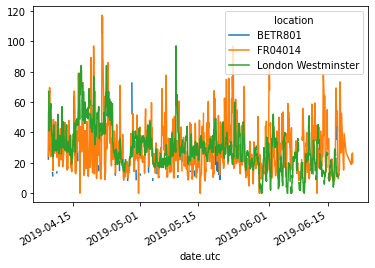

In [67]:
no2.pivot(columns="location", values="value").plot()

### 樞紐分析表(Pivot Table)

![](images/07_pivot_table.svg)

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想以表格形式在每個站點中獲取NO2和PM2.5的平均濃度

In [68]:
df_air_quality.pivot_table(    
    columns="parameter", # 3
    index="location", # 4
    values="value", # 5
    aggfunc="mean" # 5
)

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


![](images/07_excel_pivot_table.png)

樞紐分析表(Pivot Table)是Excel眾所周知的概念。當對每個變量的摘要列(Grand Total)也感興趣時，請將`margin`參數設置為`True`：

In [69]:
#margin for subtotal
df_air_quality.pivot_table(    
    columns="parameter", # 3
    index="location", # 4
    values="value", # 5
    aggfunc="mean", # 5
    margins=True,
)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


### 從寬表(wide table)轉換成長表(long table)

![](images/07_melt.svg)

In [70]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()

print(no2_pivoted)

print(type(no2_pivoted))

location                  date.utc  BETR801  FR04014  London Westminster
0        2019-04-09 01:00:00+00:00     22.5     24.4                 NaN
1        2019-04-09 02:00:00+00:00     53.5     27.4                67.0
2        2019-04-09 03:00:00+00:00     54.5     34.2                67.0
3        2019-04-09 04:00:00+00:00     34.5     48.5                41.0
4        2019-04-09 05:00:00+00:00     46.5     59.5                41.0
...                            ...      ...      ...                 ...
1700     2019-06-20 20:00:00+00:00      NaN     21.4                 NaN
1701     2019-06-20 21:00:00+00:00      NaN     24.9                 NaN
1702     2019-06-20 22:00:00+00:00      NaN     26.5                 NaN
1703     2019-06-20 23:00:00+00:00      NaN     21.8                 NaN
1704     2019-06-21 00:00:00+00:00      NaN     20.0                 NaN

[1705 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想在一列中收集所有空氣質量NO2測量值（長表）

In [71]:
no_2 = no2_pivoted.melt(id_vars="date.utc")

print(no_2)

print(type(no_2))

                      date.utc            location  value
0    2019-04-09 01:00:00+00:00             BETR801   22.5
1    2019-04-09 02:00:00+00:00             BETR801   53.5
2    2019-04-09 03:00:00+00:00             BETR801   54.5
3    2019-04-09 04:00:00+00:00             BETR801   34.5
4    2019-04-09 05:00:00+00:00             BETR801   46.5
...                        ...                 ...    ...
5110 2019-06-20 20:00:00+00:00  London Westminster    NaN
5111 2019-06-20 21:00:00+00:00  London Westminster    NaN
5112 2019-06-20 22:00:00+00:00  London Westminster    NaN
5113 2019-06-20 23:00:00+00:00  London Westminster    NaN
5114 2019-06-21 00:00:00+00:00  London Westminster    NaN

[5115 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


以上範例是應用了`pandas.melt()`的簡短版本。該方法會將`id_vars`中未提及的所有列合併為兩列：具有列標題名稱的列和具有值本身的列。預設情況下，後一列上獲取名稱值。

讓我們可以更詳細地看一下`pandas.melt()`方法的使用：

In [72]:
no_2 = no2_pivoted.melt(
    id_vars="date.utc",
    value_vars=["BETR801", "FR04014", "London Westminster"],
    value_name="NO_2",
    var_name="id_location",
)

print(no_2)

print(type(no_2))

                      date.utc         id_location  NO_2
0    2019-04-09 01:00:00+00:00             BETR801  22.5
1    2019-04-09 02:00:00+00:00             BETR801  53.5
2    2019-04-09 03:00:00+00:00             BETR801  54.5
3    2019-04-09 04:00:00+00:00             BETR801  34.5
4    2019-04-09 05:00:00+00:00             BETR801  46.5
...                        ...                 ...   ...
5110 2019-06-20 20:00:00+00:00  London Westminster   NaN
5111 2019-06-20 21:00:00+00:00  London Westminster   NaN
5112 2019-06-20 22:00:00+00:00  London Westminster   NaN
5113 2019-06-20 23:00:00+00:00  London Westminster   NaN
5114 2019-06-21 00:00:00+00:00  London Westminster   NaN

[5115 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


結果相同，但更詳細地定義：

* **value_vars** defines explicitly which columns to melt together

* **value_name** provides a custom column name for the values column instead of the default column name value

* **var_name** provides a custom column name for the column collecting the column header names. Otherwise it takes the index name or a default variable

## 如何合併來自多個表的數據？


### 合併Dataframe

![](images/08_concat_row.svg)

使用的數據: 

1. **Air quality NO2 data**
    
`air_quality_no2_long.csv`數據集為分別位於巴黎，安特衛普和倫敦的測量站FR04014，BETR801和倫敦威斯敏斯特提供了NO2值。

2. **Air quality PM2.5 data**

`air_quality_pm25_long.csv`數據集為分別位於巴黎，安特衛普和倫敦的測量站FR04014，BETR801和倫敦威斯敏斯特提供了PM2.5值。

In [73]:
air_quality_no2 = pd.read_csv("data/air_quality_no2_long.csv",parse_dates=True)

air_quality_no2 = air_quality_no2[["date.utc", "location","parameter", "value"]]

print(air_quality_no2.head())

                    date.utc location parameter  value
0  2019-06-21 00:00:00+00:00  FR04014       no2   20.0
1  2019-06-20 23:00:00+00:00  FR04014       no2   21.8
2  2019-06-20 22:00:00+00:00  FR04014       no2   26.5
3  2019-06-20 21:00:00+00:00  FR04014       no2   24.9
4  2019-06-20 20:00:00+00:00  FR04014       no2   21.4


In [74]:
air_quality_pm25 = pd.read_csv("data/air_quality_pm25_long.csv", parse_dates=True)

air_quality_pm25 = air_quality_pm25[["date.utc", "location", "parameter", "value"]]

print(air_quality_pm25.head())

                    date.utc location parameter  value
0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5


> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想將NO2和PM25的測量值（具有相似結構的兩個表）合併到一個表中

> `concat()`函數沿一個軸（row-wise 或 column-wise）執行多個表的串聯操作。

In [75]:
# 默認axis = 0 / axis = 0 是上下接 ; axis = 1 是左右接
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)

print(air_quality.info())

print(air_quality.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3178 entries, 0 to 2067
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date.utc   3178 non-null   object 
 1   location   3178 non-null   object 
 2   parameter  3178 non-null   object 
 3   value      3178 non-null   float64
dtypes: float64(1), object(3)
memory usage: 124.1+ KB
None
                    date.utc location parameter  value
0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5


默認情況下，串聯是沿axis 0進行的，因此結果表將合併rows。讓我們檢查原始表格和連接表格的shape以驗證操作：

In [76]:
print('Shape of the ``air_quality_pm25`` table: ', air_quality_pm25.shape)

print('Shape of the ``air_quality_no2`` table: ', air_quality_no2.shape)

print('Shape of the resulting ``air_quality`` table: ', air_quality.shape)

Shape of the ``air_quality_pm25`` table:  (1110, 4)
Shape of the ``air_quality_no2`` table:  (2068, 4)
Shape of the resulting ``air_quality`` table:  (3178, 4)


因此，結果資料表具有 3178 = 1110 + 2068 行。

`axis參數`將返回許多可沿軸應用的pandas方法。 DataFrame具有兩個對應的軸：第一個垂直跨行向下（axis 0），第二個水平跨列（axis 1）。預設情況下，大多數操作（如串聯或匯總統計信息）默認使用（axis 0）。

### 使用一個共同的identifier來Join Tables

![](images/08_merge_left.svg)

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想要將觀測站點元數據表提供的站點坐標添加到數據表中裡。

In [77]:
station_coord = pd.read_csv("data/air_quality_stations.csv")

print(station_coord.info())

print(station_coord.head())

print(type(station_coord))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   location               66 non-null     object 
 1   coordinates.latitude   66 non-null     float64
 2   coordinates.longitude  66 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB
None
  location  coordinates.latitude  coordinates.longitude
0  BELAL01              51.23619                4.38522
1  BELHB23              51.17030                4.34100
2  BELLD01              51.10998                5.00486
3  BELLD02              51.12038                5.02155
4  BELR833              51.32766                4.36226
<class 'pandas.core.frame.DataFrame'>


In [78]:
print(air_quality.info())

print(air_quality.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3178 entries, 0 to 2067
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date.utc   3178 non-null   object 
 1   location   3178 non-null   object 
 2   parameter  3178 non-null   object 
 3   value      3178 non-null   float64
dtypes: float64(1), object(3)
memory usage: 124.1+ KB
None
                    date.utc location parameter  value
0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5


In [79]:
air_quality_joined = pd.merge(air_quality, station_coord, how="left", on="location")

print(air_quality_joined.info())

print(air_quality_joined.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date.utc               4182 non-null   object 
 1   location               4182 non-null   object 
 2   parameter              4182 non-null   object 
 3   value                  4182 non-null   float64
 4   coordinates.latitude   4182 non-null   float64
 5   coordinates.longitude  4182 non-null   float64
dtypes: float64(3), object(3)
memory usage: 228.7+ KB
None
                    date.utc location parameter  value  coordinates.latitude  \
0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0              51.20966   
1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5              51.20966   
2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5              51.20966   
3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0              51.20966   
4  2019-06-17 05:00

使用`merge()`函數，對air_quality表中的每一行，從`station_coord`表中添加相應的坐標。這兩個表都有一個共同的列位置，該列位置用作組合信息的鍵。通過選擇`left`連接，只有air_quality（left）表中可用的位置（即FR04014，BETR801和London Westminster）最終出現在結果表中。合併功能支持多個聯接選項，類似於數據庫`join`的操作。

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 將`parameter元數據表`提供的參數完整描述和名稱添加到度量值表

> air quality `parameter元數據表`儲存在`air_quality_parameters.csv`

In [80]:
air_quality_parameters = pd.read_csv("data/air_quality_parameters.csv")

print(air_quality_parameters.info())

print(air_quality_parameters.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           7 non-null      object
 1   description  7 non-null      object
 2   name         7 non-null      object
dtypes: object(3)
memory usage: 296.0+ bytes
None
     id                                        description  name
0    bc                                       Black Carbon    BC
1    co                                    Carbon Monoxide    CO
2   no2                                   Nitrogen Dioxide   NO2
3    o3                                              Ozone    O3
4  pm10  Particulate matter less than 10 micrometers in...  PM10


In [81]:
# Before merge (join)
print(air_quality.info())

print(air_quality.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3178 entries, 0 to 2067
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date.utc   3178 non-null   object 
 1   location   3178 non-null   object 
 2   parameter  3178 non-null   object 
 3   value      3178 non-null   float64
dtypes: float64(1), object(3)
memory usage: 124.1+ KB
None
                    date.utc location parameter  value
0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5


In [82]:
# After merge (join)
air_quality = pd.merge(air_quality, air_quality_parameters, 
                       how='left', left_on='parameter', right_on='id')


print(air_quality.info())

print(air_quality.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3178 entries, 0 to 3177
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date.utc     3178 non-null   object 
 1   location     3178 non-null   object 
 2   parameter    3178 non-null   object 
 3   value        3178 non-null   float64
 4   id           3178 non-null   object 
 5   description  3178 non-null   object 
 6   name         3178 non-null   object 
dtypes: float64(1), object(6)
memory usage: 198.6+ KB
None
                    date.utc location parameter  value    id  \
0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0  pm25   
1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5  pm25   
2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5  pm25   
3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0  pm25   
4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5  pm25   

                                         description   name  
0  Particu

pandas支持inner, outer, left 與 right join。[數據庫樣式合併的用戶指南](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join)提供了有關表的聯接/合併的更多信息。
#### 避免使用full join

![](images/08_sql-joins.png)


## 如何輕鬆處理時間序列數據？

### 使用pandas的datetime屬性

範例數據: 

**Air quality NO2 data**
    
`air_quality_no2_long.csv`數據集為分別位於巴黎，安特衛普和倫敦的測量站FR04014，BETR801和倫敦威斯敏斯特提供了NO2值。

In [83]:
air_quality = pd.read_csv("data/air_quality_no2_long.csv")

air_quality = air_quality.rename(columns={"date.utc": "datetime"})


print(air_quality.info())

print(air_quality.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   datetime   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB
None
    city country                   datetime location parameter  value   unit
0  Paris      FR  2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³
1  Paris      FR  2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³
2  Paris      FR  2019-06-20 22:00:00+00:00  FR04014       no2   26.5  µg/m³
3  Paris      FR  2019-06-20 21:00:00+00:00  FR04014       no2   24.9  µg/m³
4  Paris      FR  2019-06-20 20:00:00+00:00  FR04014       no2   21.4  µg/m³


In [86]:
# find the unique list of city

city_list = air_quality.city.unique()

print(city_list)

print(type(city_list))

['Paris' 'Antwerpen' 'London']
<class 'numpy.ndarray'>


> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想使用datetime列中的日期作為datetime對象而不是純文字

> 原始datetime欄位中的值是字串，不提供任何datetime操作（例如，提取年，週等等..）。通過應用`to_datetime`函數，pandas解析了字串裡頭時間並將其轉換為datetime（即datetime64 [ns，UTC]）物件。在pandas中，它類似於python標準庫中的datetime.datetime的這些datetime物件歸類在pandas.Timestamp的package中。

In [87]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

print(air_quality.info())

print(air_quality.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   datetime   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB
None
    city country                  datetime location parameter  value   unit
0  Paris      FR 2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³
1  Paris      FR 2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³
2  Paris      FR 2019-06-20 22:00:00+00:00  FR04014       no2   26.5  µg/m³
3  Paris      FR 2019-06-20 21:00:00+00

轉換String成為pandas.Timestamp物件有何作用？

讓我們通過一些範例來說明它的價值。

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我們正在使用的時間序列數據集的開始和結束日期是什麼？

In [88]:
datetime_min_value = air_quality["datetime"].min()
datetime_max_value = air_quality["datetime"].max()

print(datetime_min_value)
print(type(datetime_min_value))

print(datetime_max_value)
print(type(datetime_max_value))

2019-05-07 01:00:00+00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2019-06-21 00:00:00+00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


使用`pandas.Timestamp`作為`datetime`可以讓我們計算日期數據並使它們具有可比較性。因此，我們可以使用它來獲取時間序列的長度:

In [89]:
time_delta = air_quality["datetime"].max() - air_quality["datetime"].min()

print(time_delta)

print(type(time_delta))

44 days 23:00:00
<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


結果是一個`pandas.Timedelta`物件，類似於標準Python庫中的`datetime.timedelta`並定義了time duration。

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 我想在DataFrame中添加一個僅包含測量月份的新欄位

> 通過使用Timestamp物件，pandas提供了許多與時間相關的屬性。例如，月份，年份，星期，季度，…等所有這些屬性都可以通過`dt`這個屬性來取得。

參考: pandas [time and date components](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-components)

In [90]:
air_quality["month"] = air_quality["datetime"].dt.month

print(air_quality.info())

print(air_quality.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   datetime   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
 7   month      2068 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 129.4+ KB
None
    city country                  datetime location parameter  value   unit  \
0  Paris      FR 2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³   
1  Paris      FR 2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³   
2  Paris      FR 2019-06-20 22:00:00+00:00  

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 每個測量站一周中每天的平均NO2濃度是多少？

In [91]:
air_quality.groupby(
    [air_quality["datetime"].dt.weekday, "location"]
)["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

## 如何處理文字數據？



In [92]:
titanic = pd.read_csv("data/titanic.csv")

print(titanic.info())

print(titanic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 將所有name都轉換成小寫。

In [93]:
name_lowercase = titanic["Name"].str.lower()

print(name_lowercase)

print(type(name_lowercase))

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object
<class 'pandas.core.series.Series'>


> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 通過提取逗號前的部分，創建一個包含乘客姓氏的新欄位。

> 使用`Series.str.split()`方法，將每個值分成2個元素的列表返回。第一個元素是逗號前面的部分，第二個元素是逗號後面的部分。

In [94]:
titanic["Name"].str.split(",")

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [100]:
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)

print(titanic["Surname"])

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 在Titanic數據裡提取有關伯爵夫人(countesses)的乘客數據。

In [96]:
titanic["Name"].str.contains("Countess")

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

In [97]:
titanic[titanic["Name"].str.contains("Countess")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 哪位Titanic乘客的名字最長？

In [98]:
titanic["Name"].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

要獲得最長的名稱，我們首先必須在“Name”列中獲得每個名字的長度。通過使用pandas字串方法，`Series.str.len()`函數將分別應用於每個名稱（按元素排列）。

In [99]:
titanic["Name"].str.len().idxmax()

307

接下來，我們需要在"Name"長度最大的表中獲得相應的位置，最好是索引標籤。 `idxmax()`方法正是這樣做的。它不是字串方法，並且應用於整數，因此不使用str。

In [101]:
titanic.loc[titanic["Name"].str.len().idxmax(), "Name"]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

> <i class="fa fa-question-circle" style="font-size: 22px;color:#DE3163;"></i> 在'Sex'列中，將'male'的值替換為'M'，將'female'的值替換為'F'。

> 儘管`replace()`不是字串方法，但它提供了使用映射或詞彙表轉換某些值的便捷方法。它需要dictionary來定義 {from : to}的映射。

In [102]:
titanic["Sex_short"] = titanic["Sex"].replace({"male": "M", "female": "F"})

print(titanic["Sex_short"])

0      M
1      F
2      F
3      F
4      M
      ..
886    M
887    F
888    F
889    M
890    M
Name: Sex_short, Length: 891, dtype: object
